In [103]:
import numpy as np

import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline

In [104]:
!pip3 install opendatasets

import opendatasets as od

od.download("https://www.kaggle.com/datasets/cbhavik/music-taste-recommendation")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Skipping, found downloaded files in "./music-taste-recommendation" (use force=True to force download)


In [105]:
import pandas as pd

In [106]:
df = pd.read_csv("/content/music-taste-recommendation/piki_dataset.csv")

In [107]:
df

,Unnamed: 0,liked,personalized,song_id,spotify_popularity,timestamp,user_id
0,0,0,1,32192,87,2019-06-21 01:04:23,3720277
1,1,0,1,6801,45,2019-06-21 01:04:33,3720277
2,2,0,1,31643,62,2019-06-21 01:04:35,3720277
3,3,0,1,1864239,72,2019-06-21 01:04:48,3720277
4,4,0,1,38804,73,2019-06-21 01:05:13,3720277
...,...,...,...,...,...,...,...
1017942,1017942,1,2,1915602,63,2022-06-12 17:53:08,3741780
1017943,1017943,0,2,4118250,56,2022-06-12 17:53:15,3741780
1017944,1017944,1,2,4161727,78,2022-06-12 17:53:25,3741780
1017945,1017945,0,2,4111176,68,2022-06-12 17:53:29,3741780


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017947 entries, 0 to 1017946
Data columns (total 7 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Unnamed: 0          1017947 non-null  int64 
 1   liked               1017947 non-null  int64 
 2   personalized        1017947 non-null  int64 
 3   song_id             1017947 non-null  int64 
 4   spotify_popularity  1017947 non-null  int64 
 5   timestamp           1017947 non-null  object
 6   user_id             1017947 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 54.4+ MB


In [109]:
df = df.drop(df.columns[[0, 3, 5, 6]],axis = 1)

In [110]:
remove_n = 617947

drop_indices = np.random.choice(df.index, remove_n, replace=False)
df_subset = df.drop(drop_indices)

In [111]:
df_subset

,liked,personalized,spotify_popularity
0,0,1,87
3,0,1,72
4,0,1,73
7,0,1,60
8,1,1,85
...,...,...,...
1017936,0,2,69
1017937,1,2,70
1017943,0,2,56
1017945,0,2,68


In [112]:
df_subset.describe()

,liked,personalized,spotify_popularity
count,400000.000000,400000.000000,400000.000000
mean,0.465402,0.943723,54.815725
std,0.605040,0.402226,20.711667
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,43.000000
50%,0.000000,1.000000,56.000000
75%,1.000000,1.000000,69.000000
max,2.000000,2.000000,100.000000


In [113]:
X = df_subset.to_numpy()
X

array([[ 0,  1, 87],
       [ 0,  1, 72],
       [ 0,  1, 73],
       ...,
       [ 0,  2, 56],
       [ 0,  2, 68],
       [ 1,  2, 80]])

In [114]:
X_meaned = X - np.mean(X , axis = 0)
print (X_meaned)

[[-0.4654025  0.0562775 32.184275 ]
 [-0.4654025  0.0562775 17.184275 ]
 [-0.4654025  0.0562775 18.184275 ]
 ...
 [-0.4654025  1.0562775  1.184275 ]
 [-0.4654025  1.0562775 13.184275 ]
 [ 0.5345975  1.0562775 25.184275 ]]


In [115]:
X_meaned

array([[-0.4654025,  0.0562775, 32.184275 ],
       [-0.4654025,  0.0562775, 17.184275 ],
       [-0.4654025,  0.0562775, 18.184275 ],
       ...,
       [-0.4654025,  1.0562775,  1.184275 ],
       [-0.4654025,  1.0562775, 13.184275 ],
       [ 0.5345975,  1.0562775, 25.184275 ]])

In [116]:
print(X.shape)
print (X_meaned.shape)

(400000, 3)
(400000, 3)


In [117]:
cov_mat = np.cov(X_meaned , rowvar = False) 

In [118]:
print (cov_mat.shape)
print (cov_mat)

(3, 3)
[[3.66073928e-01 4.25967957e-02 2.01124457e+00]
 [4.25967957e-02 1.61785747e-01 9.15399252e-01]
 [2.01124457e+00 9.15399252e-01 4.28973145e+02]]


In [119]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

In [120]:
print (eigen_vectors.shape)
print (eigen_values)

(3, 3)
[1.52639773e-01 3.63827423e-01 4.28984538e+02]


In [121]:
sorted_index = np.argsort(eigen_values)[::-1]
print (sorted_index)
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]
print (sorted_eigenvectors)
print ('**********')
print (sorted_eigenvalue)

[2 1 0]
[[-0.00469254 -0.98281454  0.18453604]
 [-0.00213512 -0.18452781 -0.98282497]
 [-0.99998671  0.00500595  0.00123252]]
**********
[4.28984538e+02 3.63827423e-01 1.52639773e-01]


In [122]:
n_components =2  #select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [123]:
print (eigenvector_subset)

[[-0.00469254 -0.98281454]
 [-0.00213512 -0.18452781]
 [-0.99998671  0.00500595]]


In [124]:
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
print(X_reduced)

[[-32.18178353   0.60813247]
 [-17.18198287   0.53304321]
 [-18.18196958   0.53804916]
 ...
 [ -1.18433062   0.2684202 ]
 [-13.18417115   0.32849161]
 [-25.18870421  -0.59425153]]


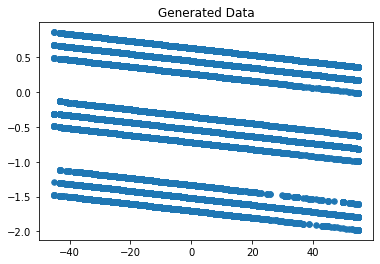

In [125]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1] , s=30)
plt.title('Generated Data');

In [126]:
X_ = np.dot(X_reduced,np.linalg.pinv(eigenvector_subset)) + np.mean(X , axis = 0)
X_

array([[1.87353322e-02, 9.00217040e-01, 8.70001251e+01],
       [2.21469995e-02, 8.82046759e-01, 7.20001479e+01],
       [2.19195550e-02, 8.83258111e-01, 7.30001464e+01],
       ...,
       [2.07152741e-01, 8.96720195e-01, 5.60013836e+01],
       [2.04423407e-01, 9.11256420e-01, 6.80013653e+01],
       [1.16764052e+00, 1.10715927e+00, 8.00011197e+01]])

In [127]:
df_ = pd.DataFrame(X_)
df_

,0,1,2
0,0.018735,0.900217,87.000125
1,0.022147,0.882047,72.000148
2,0.021920,0.883258,73.000146
3,0.024876,0.867511,60.000166
4,0.985137,1.079161,84.999901
...,...,...,...
399995,0.204196,0.912468,69.001364
399996,1.169915,1.095046,70.001135
399997,0.207153,0.896720,56.001384
399998,0.204423,0.911256,68.001365


In [128]:
df_.describe()

,0,1,2
count,400000.000000,400000.000000,400000.000000
mean,0.465403,0.943723,54.815725
std,0.600730,0.119767,20.711667
min,-0.165588,0.760774,-0.001409
25%,0.024649,0.851763,43.000192
50%,0.031017,0.880835,56.000172
75%,0.990823,1.042820,69.001364
max,2.151783,1.312753,100.001317
